##### Stable Video Diffusion (SVD) is a powerful image-to-video generation model that can generate 2-4 second high resolution (576x1024) videos conditioned on an input image.

In [1]:
!pip install -q -U diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 35.0 MB/s eta 0:00:00


Two variants of this model:
*   SVD (14 frames)
*   SVD-XT (25 frames)



In [2]:
import torch
from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
pipe = StableVideoDiffusionPipeline.from_pretrained(
    "stabilityai/stable-video-diffusion-img2vid-xt", torch_dtype=torch.float16, variant="fp16"
)

pipe.enable_model_cpu_offload()

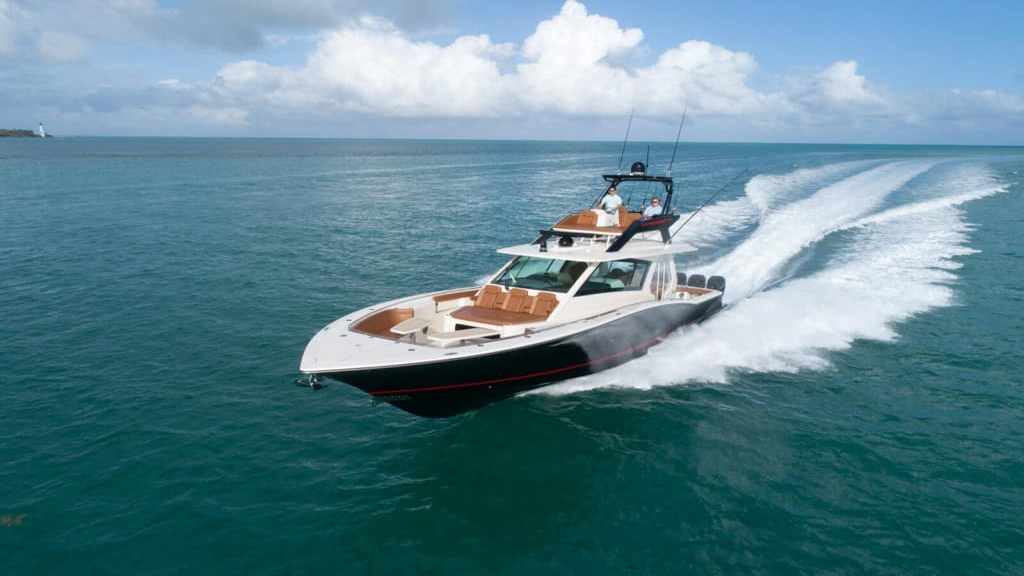

In [4]:
# Load the conditioning image
image = load_image("https://www.scoutboats.com/wp-content/uploads/2018/12/530lxf-running-DJI_0138-1024x682.jpg")
image = image.resize((1024, 576))
image

In [5]:
generator = torch.manual_seed(42)

In [6]:
frames = pipe(image, decode_chunk_size=8, generator=generator).frames[0]

export_to_video(frames, "generated.mp4", fps=7)

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


'generated.mp4'

In [8]:
# Reduce memory: enable model offloading, enable feed-forward chunking, reduce decode_chunk_size
pipe.unet.enable_forward_chunking()
frames = pipe(image, decode_chunk_size=2, generator=generator, num_frames=25).frames[0]

export_to_video(frames, "generated1.mp4", fps=7)

  0%|          | 0/25 [00:00<?, ?it/s]

'generated1.mp4'

##### Micro-conditioning
* motion_bucket_id: control the motion of the generated video. Increasing the motion bucket id increases the motion of the generated video.
* noise_aug_strength: the amount of noise added to the conditioning image. Increasing this value also increases the motion of the generated video.




In [9]:
frames = pipe(image, decode_chunk_size=8, generator=generator, motion_bucket_id=180, noise_aug_strength=0.1).frames[0]
export_to_video(frames, "generated2.mp4", fps=7)

  0%|          | 0/25 [00:00<?, ?it/s]

'generated2.mp4'